In [50]:
from sklearn.manifold import TSNE
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN 
import csv
import os
import numpy as np
import json
from sklearn.manifold import TSNE

In [51]:
meta = None
with open('./scraped/metadata.json') as f:
    meta = json.load(f)

In [52]:
index2name = []
for m in meta:
    index2name.append(m.get('name'))

In [53]:
index2name[:5]

['Bitcoin', 'Ethereum', 'BNB', 'XRP', 'Cardano']

In [54]:
embed = []
for m in meta:
    feats = np.array([m.get('market_cap'), m.get('fully_diluted_market_cap'), m.get('circulating_supply'), m.get('total_supply')])
    embed.append(feats)
embed = np.array(embed)

In [55]:
embed

array([[8.53156332e+11, 8.53156332e+11, 1.89955000e+07, 1.89955000e+07],
       [3.82421302e+11, 3.82421302e+11, 1.20135312e+08, 1.20135312e+08],
       [6.90548205e+10, 6.90548205e+10, 1.65116761e+08, 1.65116761e+08],
       ...,
       [6.32231262e+07, 6.32231262e+07, 5.95248695e+08, 6.55932996e+08],
       [6.30349240e+07, 6.30349240e+07, 3.38541660e+07, 2.50000000e+08],
       [6.25803319e+07, 6.25803319e+07, 4.40859613e+16, 4.67758553e+16]])

In [56]:
tsne = TSNE(n_components=2).fit_transform(embed)

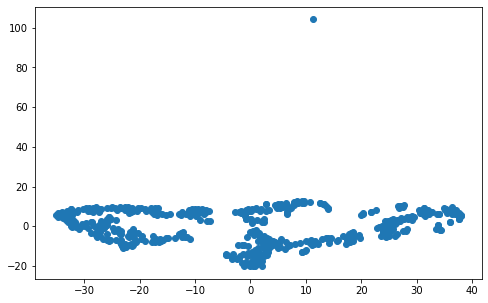

In [57]:
df_subset = {}
df_subset['x'] = tsne[:,0]
df_subset['y'] = tsne[:,1]
plt.figure(figsize=(8,5))
plt.scatter(df_subset['x'], df_subset['y'])

In [58]:
dbscan = DBSCAN(eps=3, min_samples=2).fit(tsne)
dbscan.labels_

array([ 0,  0,  0,  1,  2,  0,  0,  0,  0,  1,  2,  2,  3,  2,  0,  1,  2,
        0,  0,  0,  0,  0,  0,  1,  0,  2,  0,  0,  1,  0,  1,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  3,  0,  1,  1,  0,  1,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  4,  1,  1,
        4,  1,  5,  1,  1,  5,  5,  5,  4,  5,  5,  4,  5,  1,  5,  5,  1,
        4,  4,  1,  5,  5,  4,  5,  4,  5,  4,  5,  1,  5,  4,  5,  5,  1,
        5,  4,  5,  4,  4,  5,  1,  4,  4,  4,  4,  5,  5,  5,  5,  1,  3,
        4,  1,  4,  3,  4,  1,  5,  4,  5,  1,  5,  4,  4,  4,  1,  4,  5,
        5,  1,  4,  1,  5,  5,  4,  5,  5,  5,  4,  5,  4,  1,  4,  5,  4,
        4,  5,  1,  1,  4,  5,  5,  5,  4,  4,  4,  4,  5,  5,  4,  1,  4,
        4,  5,  1,  4,  4,  5,  5,  1,  1,  4,  5,  1,  1,  0,  1,  0,  0,
        4,  0,  1,  0,  0,  5,  5,  1,  1,  4,  5,  1,  5,  4,  4,  5,  5,
        4,  5,  4,  5,  4

In [59]:
tsne_label = np.hstack((tsne, dbscan.labels_[:, np.newaxis]))

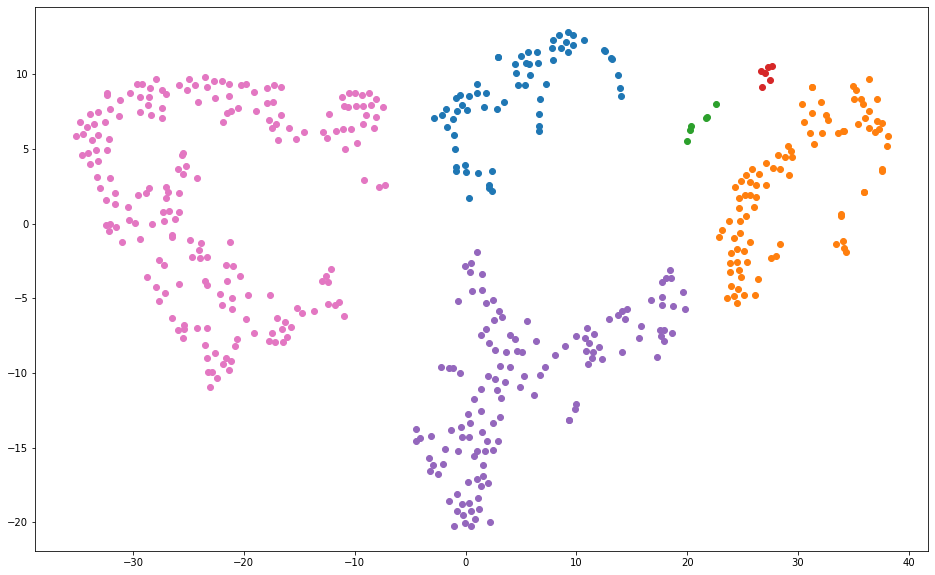

In [60]:
COLORS = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:pink']

plt.figure(figsize=(16,10))
for i in range(6):
    data = tsne_label[tsne_label[:, 2] == i]
    plt.scatter(data[:, 0], data[:, 1], color=COLORS[i])
plt.savefig("dbscan.jpg", dpi=500)